In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use('ggplot')

In [3]:
# 声明使用 Seaborn 样式
sns.set()
# 有五种seaborn的绘图风格，它们分别是：darkgrid, whitegrid, dark, white, ticks。默认的主题是darkgrid。
sns.set_style("whitegrid")
# 有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。
sns.set_context('notebook')
# 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

In [4]:
label = pd.read_csv('train.csv')['isDefault']

In [5]:
train_clean=pd.read_csv('train_clean.csv')#读取清洗过的数据
train_clean

,loanAmnt,term,subGrade,employmentTitle,employmentLength,annualIncome,postCode,regionCode,dti,delinquency_2years,...,19,20,21,22,pca1,pca2,pca3,pca4,pca5,pca6
0,35000.0,5,52,320.0,2,110000.0,137.0,32,17.05,0.0,...,0.0,0.0,0.0,0.0,-4.595706,8.694916,-3.188366,-0.169579,2.479239,0.479253
1,18000.0,5,42,219843.0,5,46000.0,156.0,18,27.83,0.0,...,0.0,0.0,0.0,0.0,-4.937371,-4.775256,1.100548,3.090222,2.760321,1.048221
2,12000.0,5,43,31698.0,8,74000.0,337.0,14,22.77,0.0,...,0.0,0.0,0.0,0.0,-7.595630,9.302842,9.106804,-0.498371,-2.399446,-0.157931
3,11000.0,3,14,46854.0,10,118000.0,148.0,11,17.21,0.0,...,0.0,0.0,0.0,0.0,5.034018,1.387625,-9.329300,-1.161320,1.673193,-3.038974
4,3000.0,3,32,54.0,5,29000.0,301.0,21,32.16,0.0,...,1.0,0.0,0.0,0.0,1.427854,0.503294,2.673627,-1.574145,-5.189906,0.596302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,25000.0,3,34,2659.0,7,72000.0,242.0,8,19.03,0.0,...,0.0,0.0,0.0,0.0,-4.011804,-12.717511,3.177589,-1.372134,-1.961407,-0.117767
799996,17000.0,3,14,29205.0,10,99000.0,563.0,10,15.72,1.0,...,0.0,0.0,0.0,0.0,9.584216,17.610358,-7.858493,-2.278297,3.161470,-2.628877
799997,6000.0,3,33,2582.0,10,65000.0,47.0,17,12.11,1.0,...,0.0,0.0,0.0,0.0,-1.109531,15.109610,0.586191,-7.238320,-1.920056,1.976286
799998,19200.0,3,14,151.0,10,96000.0,34.0,18,29.25,0.0,...,0.0,0.0,0.0,0.0,16.639183,0.088650,0.520932,-0.935709,-0.968637,0.953337


In [31]:
def f(x):
    if x in oh_map.keys:
        return oh_map[x]
    else:
        return x
new_col=map(f,list(train_clean.columns))
print(list(new_col))

TypeError: argument of type 'builtin_function_or_method' is not iterable

In [34]:
train_clean.columns

Index(['loanAmnt', 'term', 'subGrade', 'employmentTitle', 'employmentLength',
       'annualIncome', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeHigh', 'pubRec', 'pubRecBankruptcies', 'revolBal',
       'revolUtil', 'initialListStatus', 'applicationType', 'title',
       'policyCode', 'n0', 'n6', 'n11', 'n12', 'n13', 'n14', 'CreditLine', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', 'pca1', 'pca2',
       'pca3', 'pca4', 'pca5', 'pca6'],
      dtype='object')

In [55]:
oh_col=['homeOwnership','verificationStatus','purpose']
train=pd.read_csv('train.csv').loc[:,oh_col]
train

,homeOwnership,verificationStatus,purpose
0,2,2,1
1,0,2,0
2,0,2,0
3,1,1,4
4,1,2,10
...,...,...,...
799995,1,0,0
799996,0,2,4
799997,1,2,0
799998,0,2,4


# Logistics Regression

In [6]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split会报错，
#原因在于这个cross_validatio这个包早就不在使用了，划分到了model_selection这个包中。

## 拟合

In [7]:
# 1.加载数据
iris = datasets.load_iris()
X = train_clean
Y = label

# 2.拆分测试集、训练集。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)# 设置随机数种子，以便比较结果。

In [8]:
# 3.标准化特征值
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
# 4. 训练逻辑回归模型
logreg = linear_model.LogisticRegression(C = 0.01, penalty = 'l1',solver='liblinear')
logreg.fit(X_train, Y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

## 正则化惩罚力度

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

#Recall = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report
from sklearn.model_selection import cross_val_predict, KFold, cross_val_score

## 阈值

In [11]:
# 5. 预测
prepro = logreg.predict_proba(X_test_std)

In [12]:
logreg.score(X_train_std,Y_train)#训练集得分

0.5681892857142857

In [13]:
def plot_confusion_matrix(cm, classes,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        绘制混淆矩阵
        """
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=0)
        plt.yticks(tick_marks, classes)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

给定阈值为: 0.1
正确率 0.20028333333333334
精准率 0.20028333333333334
召回率 1.0
调和平均值F1 0.33372675895969006
给定阈值为: 0.2
正确率 0.20028333333333334
精准率 0.20028333333333334
召回率 1.0
调和平均值F1 0.33372675895969006
给定阈值为: 0.3
正确率 0.21456666666666666
精准率 0.20257700518450747
召回率 0.9949654655904135
调和平均值F1 0.3366179141035206
给定阈值为: 0.4
正确率 0.38561666666666666
精准率 0.22970856042557358
召回率 0.8785678621952234
调和平均值F1 0.3641953482756539
给定阈值为: 0.5
正确率 0.5705333333333333
精准率 0.2692669094081917
召回率 0.6676999251060997
调和平均值F1 0.3837691765015365
给定阈值为: 0.6
正确率 0.7612416666666667
精准率 0.3682287801815172
召回率 0.2684114171590247
调和平均值F1 0.3104950304430486
给定阈值为: 0.7
正确率 0.7925875
精准率 0.43046411444363164
召回率 0.11017724889739536
调和平均值F1 0.17544847691772542
给定阈值为: 0.8
正确率 0.7951458333333333
精准率 0.30248469571480013
召回率 0.017475243405176002
调和平均值F1 0.03304159701052218
给定阈值为: 0.9
正确率 0.7959333333333334
精准率 0.30631399317406144
召回率 0.014937172339186153
调和平均值F1 0.028485281282234386


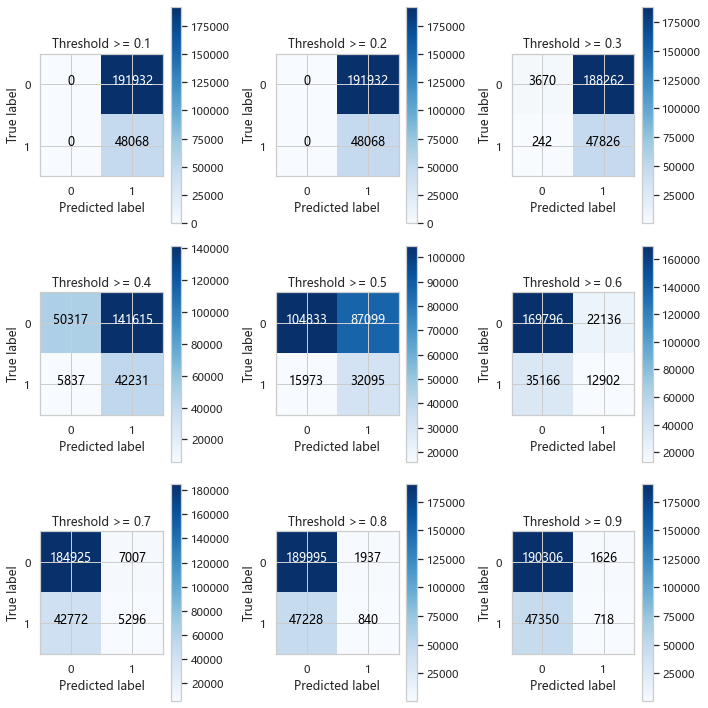

In [40]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1

y_pred_undersample_proba = prepro
# 用混淆矩阵来进行展示
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1

    cnf_matrix = confusion_matrix(Y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("给定阈值为:",i,)#"时测试集召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    four_scores(Y_test,y_test_predictions_high_recall)
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)
plt.savefig('九个混淆矩阵》png')
plt.show()

In [41]:
from sklearn.metrics import accuracy_score   #正确率
from sklearn.metrics import precision_score    #精准率
from sklearn.metrics import recall_score      #召回率
from sklearn.metrics import f1_score         #调和平均值F1
def four_scores(Y_test,y_hat):
    #默认1类别为正例，可通过pos_label参数指定
    print('正确率',accuracy_score(Y_test,y_hat))#样本不均衡时有局限性：都判断为数量多的那一类，结果正确率也很高
    print('精准率',precision_score(Y_test,y_hat))
    print('召回率',recall_score(Y_test,y_hat))
    print('调和平均值F1',f1_score(Y_test,y_hat))

In [48]:
thresholds=np.linspace(0,1,100)
accuracy_scores=[]
precision_scores=[]
recall_scores=[]
f1_scores=[]
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i

    cnf_matrix = confusion_matrix(Y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    
    accuracy_scores.append(accuracy_score(Y_test,y_test_predictions_high_recall))
    precision_scores.append(precision_score(Y_test,y_test_predictions_high_recall))
    recall_scores.append(recall_score(Y_test,y_test_predictions_high_recall))
    f1_scores.append(f1_score(Y_test,y_test_predictions_high_recall))

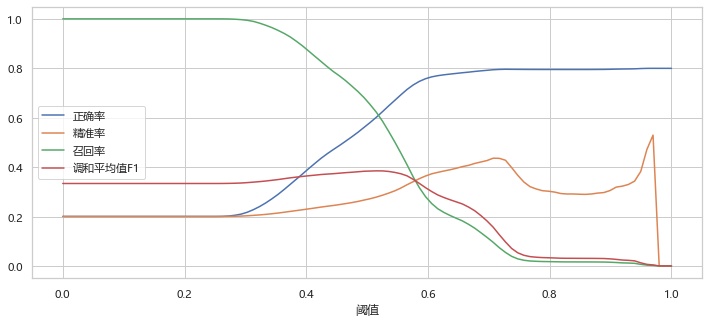

In [52]:
ls1=['正确率','精准率','召回率','调和平均值F1']
ls2=[accuracy_scores,precision_scores,recall_scores,f1_scores]

plt.figure(figsize=(12,5))
for i in range(4):    
    plt.plot(thresholds,ls2[i],label=ls1[i])
plt.legend()
plt.xlabel('阈值')
plt.savefig('阈值得分图.png')
plt.show()

In [ ]:
logreg.score(X_test_std,Y_test)#测试集得分

## 查看Logistic回归模型的系数w

In [24]:
w=logreg.coef_
w.shape

(1, 55)

In [25]:
train_clean.columns
col=np.array(train_clean.columns)
col

array(['loanAmnt', 'term', 'subGrade', 'employmentTitle',
       'employmentLength', 'annualIncome', 'postCode', 'regionCode',
       'dti', 'delinquency_2years', 'ficoRangeHigh', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'initialListStatus',
       'applicationType', 'title', 'policyCode', 'n0', 'n6', 'n11', 'n12',
       'n13', 'n14', 'CreditLine', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5',
       'pca6'], dtype=object)

In [26]:
dic=dict(zip(col,w[0]))
dic

{'loanAmnt': 1.4103241863642241e-05,
 'term': 0.2522795479825378,
 'subGrade': 0.031245797392404455,
 'employmentTitle': -5.371683826561805e-07,
 'employmentLength': -0.009482167988204978,
 'annualIncome': -2.1022500663626047e-06,
 'postCode': 0.00011219227415961837,
 'regionCode': 0.0001623259398444779,
 'dti': 0.01109377367654708,
 'delinquency_2years': 0.04662609553303595,
 'ficoRangeHigh': -0.005178941060097089,
 'pubRec': 0.012822719562703245,
 'pubRecBankruptcies': 0.0008185310618220532,
 'revolBal': -4.093418755114816e-06,
 'revolUtil': -0.00028029766616753334,
 'initialListStatus': -0.07206400874184538,
 'applicationType': 0.0,
 'title': -2.7209983707668694e-06,
 'policyCode': 0.0,
 'n0': 7.046326546502923e-06,
 'n6': 0.014096055602440512,
 'n11': 0.0,
 'n12': 0.0,
 'n13': -0.016760112146357243,
 'n14': 0.06132289739438935,
 'CreditLine': 0.0029672737854998274,
 '0': -0.2116821412956303,
 '1': 0.10632252483321435,
 '2': 0.0,
 '3': 0.0,
 '4': 0.0,
 '5': 0.0,
 '6': -0.12028100083

In [27]:
#下面的是按照value的值从大到小的顺序来排序。
dic= sorted(dic.items(), key=lambda d:d[1], reverse = True)
dic=pd.DataFrame(dic)

In [38]:
dic['abs']=dic.iloc[:,1].apply(func=lambda x: abs(x))
dic.sort_values(by='abs',ascending=False).head(20).to_csv('temp.csv')

## 计算混淆矩阵结果

In [29]:
from sklearn.metrics import confusion_matrix
y_hat=logreg.predict(X_test_std)
confusion_matrix(y_true=Y_test,y_pred=y_hat)

array([[104833,  87099],
       [ 15973,  32095]], dtype=int64)

召回率:  0.6676999251060997


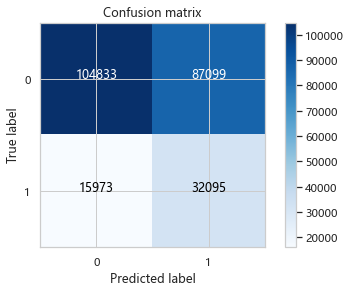

In [30]:
import itertools
# lr = LogisticRegression(C = best_c, penalty = 'l1')

# 计算所需值
cnf_matrix = confusion_matrix(Y_test,y_hat)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [31]:
from sklearn.metrics import accuracy_score   #正确率
from sklearn.metrics import precision_score    #精准率
from sklearn.metrics import recall_score      #召回率
from sklearn.metrics import f1_score         #调和平均值F1
def four_scores(Y_test,y_hat):
    #默认1类别为正例，可通过pos_label参数指定
    print('正确率',accuracy_score(Y_test,y_hat))#样本不均衡时有局限性：都判断为数量多的那一类，结果正确率也很高
    print('精准率',precision_score(Y_test,y_hat))
    print('召回率',recall_score(Y_test,y_hat))
    print('调和平均值F1',f1_score(Y_test,y_hat))
four_scores(Y_test,y_hat)

正确率 0.5705333333333333
精准率 0.2692669094081917
召回率 0.6676999251060997
调和平均值F1 0.3837691765015365


## ROC曲线


概念：ROC(Receiver Operating Characteristic——受试者工作特征曲线)，使用图形来描述二分类模型的性能表现。

TPR：True Positive Rate真正例率，模型预测为真的正例在真实正例的占比=召回率
FPR：False Positive Rate假正例率，模型预测为假的正例在真实负例的占比
纵轴为TPR，横轴为假正例率

AUC：ROC曲线的面积

AUC(Area Under the Curve)：ROC曲线下面积，使用AUC值作为评价标准是因为有时候ROC曲线并不能清晰的说明哪个分类器的效果更好，而AUC作为数值可以直观的评价分类器的好坏，值越大越好。

    ROC曲线
    roc_curve函数的阈值是返回值，根据提供的模型预测正例概率反推出来的
    roc_curve返回三个值，分别是fpr、tpr和阈值；常用三个参数，真实的类别、模型预测为类别1的概率、pos_label=1设置类别1为正例

In [32]:
#ROC曲线
from sklearn.metrics import roc_curve
#AUC：auc和roc_auc_score都可以得出结果，所需参数不同
from sklearn.metrics import auc,roc_auc_score
#roc_curve返回三个值，分别是fpr、tpr和阈值；常用三个参数，真实的类别、模型预测为类别1的概率、pos_label=1设置类别1为正例
fpr,tpr,thresholds = roc_curve(Y_test,prepro[:,1],pos_label=1)
print('fpr值：',fpr)
print('tpr值：',tpr)
print('thresholds值：',thresholds)
#auc函数参数为fpr、tpr
print('AUC面积值：',auc(fpr,tpr))
#roc_auc_score函数参数为真实类别、模型预测为类别1的概率
print('AUC面积得分：',roc_auc_score(y_true=Y_test,y_score=prepro[:,1]))


fpr值： [0. 0. 0. ... 1. 1. 1.]
tpr值： [0.00e+00 2.08e-05 4.16e-05 ... 1.00e+00 1.00e+00 1.00e+00]
thresholds值： [1.98 0.98 0.98 ... 0.26 0.26 0.25]
AUC面积值： 0.6518671403207071
AUC面积得分： 0.6518671403207071


绘图ROC曲线

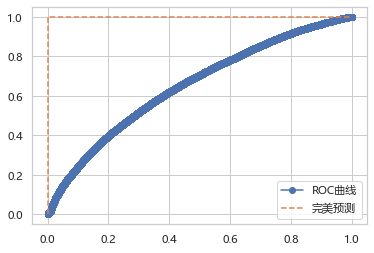

In [33]:
plt.plot(fpr,tpr,marker='o',label='ROC曲线')
plt.plot([0,0,1],[0,1,1],ls='--',label='完美预测')
plt.legend()
plt.show()

# XGBoost

In [34]:
from xgboost.sklearn import XGBClassifier
clf1 = XGBClassifier(n_jobs=-1)
clf1.fit(X_train,Y_train)

[16:27:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
clf1.score(X_train,Y_train)#训练集准确率

0.8132839285714286

In [22]:
clf1.score(X_test,Y_test)#测试集准确率

0.8041916666666666

In [23]:
# AUC
from sklearn.metrics import roc_curve, auc
predict_proba = clf1.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predict_proba[:,1])
auc(false_positive_rate, true_positive_rate)

0.7250340708480686

In [53]:
import itertools
# lr = LogisticRegression(C = best_c, penalty = 'l1')

# 计算所需值
cnf_matrix = confusion_matrix(Y_test,clf1(X_test))
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

TypeError: 'XGBClassifier' object is not callable